
#IDS ML PROJECT



In [ ]:
import pandas as pd
import numpy as np
from pandas import read_csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np

# I - **Importation data**

In [ ]:


column_names = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted'
,'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate'
,'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','attack','level'])

file_path = '/content/KDDTrain+.txt'
train = pd.read_csv(file_path, header=0, names=column_names)
print(train)

        duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0              0           udp     other   SF        146          0     0   
1              0           tcp   private   S0          0          0     0   
2              0           tcp      http   SF        232       8153     0   
3              0           tcp      http   SF        199        420     0   
4              0           tcp   private  REJ          0          0     0   
...          ...           ...       ...  ...        ...        ...   ...   
125967         0           tcp   private   S0          0          0     0   
125968         8           udp   private   SF        105        145     0   
125969         0           tcp      smtp   SF       2231        384     0   
125970         0           tcp    klogin   S0          0          0     0   
125971         0           tcp  ftp_data   SF        151          0     0   

        wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0      

# **II- Informations sur la data**

In [ ]:
# Nb Lignes et colonnes du data
print("Taille initial du trainset:",train.shape)

Taille initial du dataset: (125972, 43)


In [ ]:
# Informations sur le dataframe
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [ ]:
# Afficher les premières 5 lignes du data
print(train.head())

   duration protocol_type  service flag  src_bytes  dst_bytes  land  \
0         0           udp    other   SF        146          0     0   
1         0           tcp  private   S0          0          0     0   
2         0           tcp     http   SF        232       8153     0   
3         0           tcp     http   SF        199        420     0   
4         0           tcp  private  REJ          0          0     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.00   
1               0       0    0  ...                    0.10   
2               0       0    0  ...                    1.00   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    0.07   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.60                         0.88   
1                    0.05                         0.00   
2                   

In [ ]:
# Statistiques descriptives sur le data
print(train.describe())

            duration     src_bytes     dst_bytes           land  \
count  125972.000000  1.259720e+05  1.259720e+05  125972.000000   
mean      287.146929  4.556710e+04  1.977927e+04       0.000198   
std      2604.525522  5.870354e+06  4.021285e+06       0.014086   
min         0.000000  0.000000e+00  0.000000e+00       0.000000   
25%         0.000000  0.000000e+00  0.000000e+00       0.000000   
50%         0.000000  4.400000e+01  0.000000e+00       0.000000   
75%         0.000000  2.760000e+02  5.160000e+02       0.000000   
max     42908.000000  1.379964e+09  1.309937e+09       1.000000   

       wrong_fragment         urgent            hot  num_failed_logins  \
count   125972.000000  125972.000000  125972.000000      125972.000000   
mean         0.022688       0.000111       0.204411           0.001222   
std          0.253531       0.014366       2.149977           0.045239   
min          0.000000       0.000000       0.000000           0.000000   
25%          0.000000     

In [ ]:
#Valeurs uniques pour chaque colonne
for column in train.columns:
    unique_values = train[column].unique()
    print(f"Valeurs uniques pour la colonne {column}: {unique_values}")


Valeurs uniques pour la colonne duration: [    0  5607   507 ...  5430 11680   679]
Valeurs uniques pour la colonne protocol_type: ['udp' 'tcp' 'icmp']
Valeurs uniques pour la colonne service: ['other' 'private' 'http' 'remote_job' 'ftp_data' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']
Valeurs uniques pour la colonne flag: ['SF' 'S0' 'REJ' 'RSTR' 'SH' 'RSTO' 'S1' 'RSTOS0' 'S3' 'S2' 'OTH']
Valeurs uniques pour la colonne src_bytes: [  146     0   232 ...  2816 11466  235

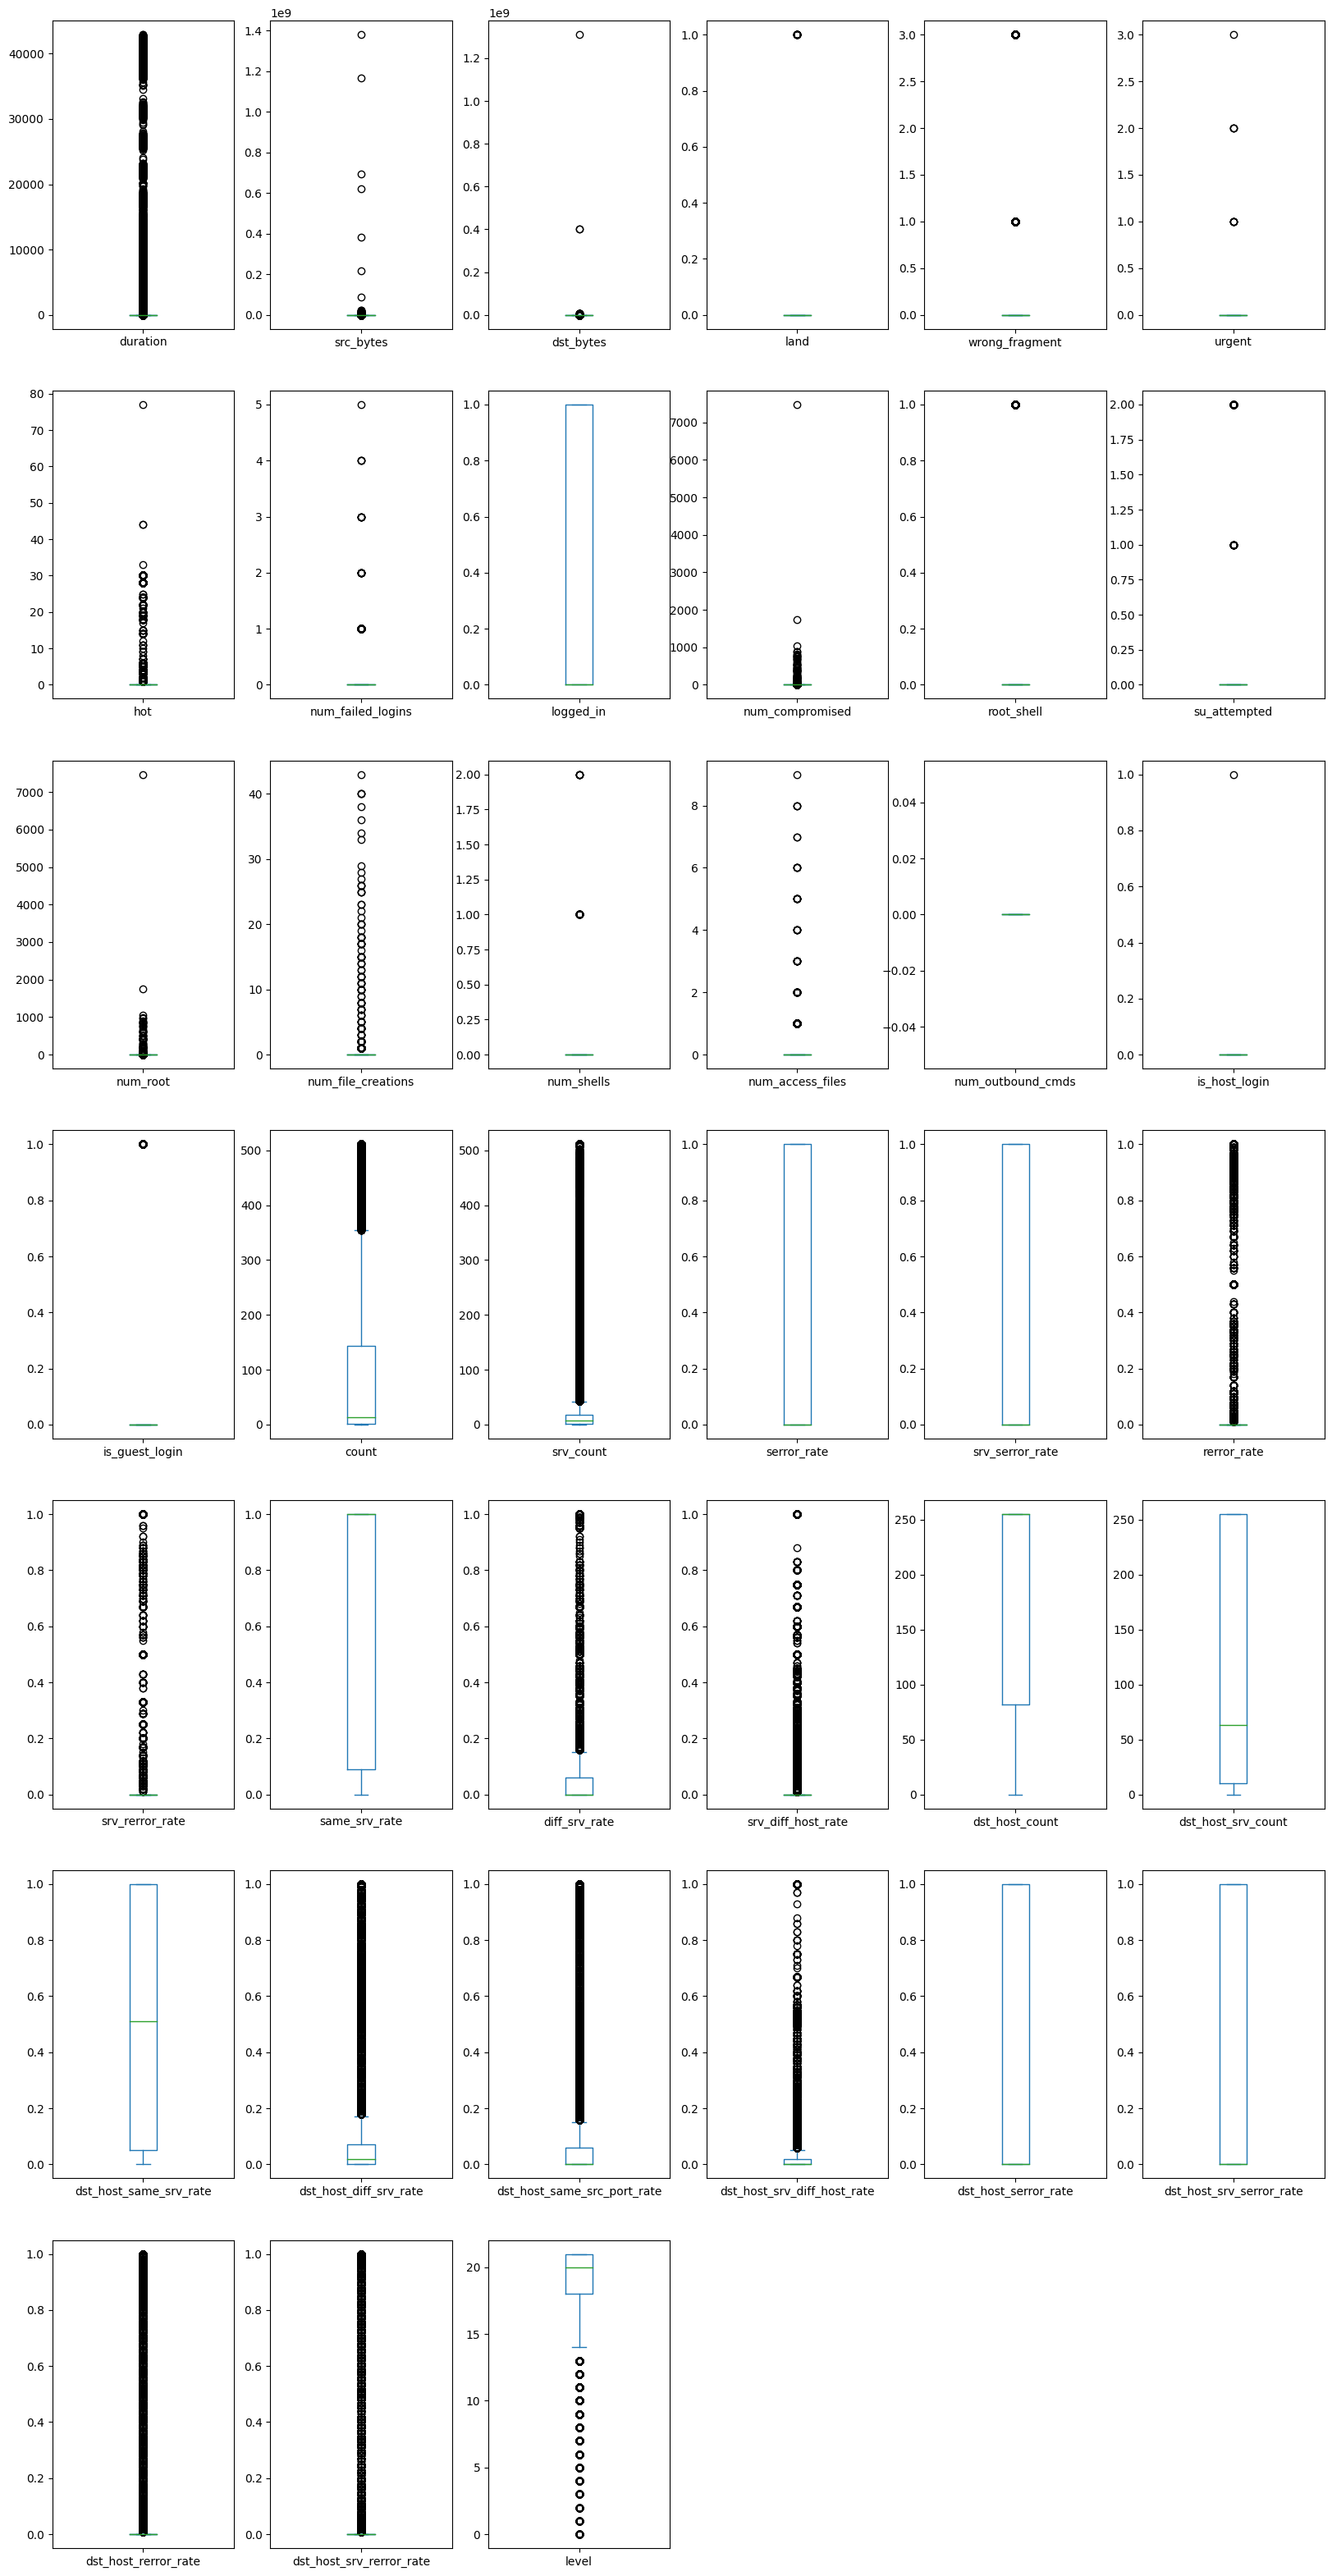

In [ ]:
#Visualisation du trainset
train.plot(kind='box', subplots=True, layout=(7, 6), figsize=(20, 40))
plt.show()


Verifier l'equilibrage de la data

In [ ]:
class_counts = train['attack'].value_counts()
class_percentages = (class_counts / len(train)) * 100
ax = class_percentages.plot(kind='bar')
plt.xlabel('Classes')
plt.ylabel('Pourcentage d\'exemples')
plt.title('Répartition des classes en pourcentage')
for i, v in enumerate(class_percentages):
    ax.text(i, v, f'{v:.2f}%', ha='center', va='bottom')
plt.show()

# III- **Data Preparation**


In [ ]:
# Vérifier les lignes dupliquées dans le trainFrame
duplicates = train[train.duplicated()]

# Afficher le nombre total de lignes dupliquées
print(f"Nombre total de lignes dupliquées : {len(duplicates)}")


Nombre total de lignes dupliquées : 0


In [ ]:
# Vérifier les missing values
train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

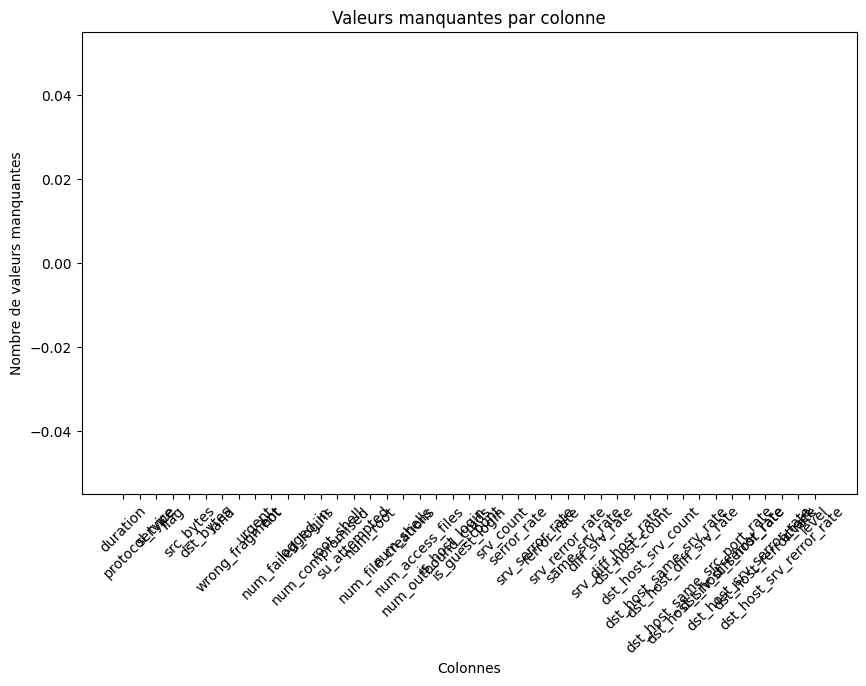

In [ ]:
#Représentation des missing values
missing_mask = train.isnull()
missing_count = missing_mask.sum()
plt.figure(figsize=(10, 6))
plt.bar(missing_count.index, missing_count)
plt.xlabel('Colonnes')
plt.ylabel('Nombre de valeurs manquantes')
plt.title('Valeurs manquantes par colonne')
plt.xticks(rotation=45)
plt.show()

In [ ]:
def detect_outliers_iqr(data, threshold=1.5):
    outliers_info = {}

    for column in data.columns:
        if data[column].dtype in [int, float]:
            q1 = data[column].quantile(0.25)
            q3 = data[column].quantile(0.75)
            iqr = q3 - q1

            lower_bound = q1 - threshold * iqr
            upper_bound = q3 + threshold * iqr

            column_outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

            if not column_outliers.empty:
                num_outliers = len(column_outliers)
                percent_outliers = (num_outliers / len(data)) * 100
                outliers_info[column] = {"outliers_df": column_outliers, "num_outliers": num_outliers, "percent_outliers": percent_outliers}

    return outliers_info

outliers_info = detect_outliers_iqr(train)

# Afficher les colonnes avec des valeurs aberrantes, le nombre de valeurs aberrantes, et le pourcentage de valeurs aberrantes
for column, info in outliers_info.items():
    print(f"Outliers in column '{column}': {info['num_outliers']} outliers ({info['percent_outliers']:.2f}%)")
    #print(info['outliers_df'].head())
    #print("\n")

Outliers in column 'duration': 10018 outliers (7.95%)
Outliers in column 'src_bytes': 13840 outliers (10.99%)
Outliers in column 'dst_bytes': 23579 outliers (18.72%)
Outliers in column 'land': 25 outliers (0.02%)
Outliers in column 'wrong_fragment': 1090 outliers (0.87%)
Outliers in column 'urgent': 9 outliers (0.01%)
Outliers in column 'hot': 2671 outliers (2.12%)
Outliers in column 'num_failed_logins': 122 outliers (0.10%)
Outliers in column 'num_compromised': 1286 outliers (1.02%)
Outliers in column 'root_shell': 169 outliers (0.13%)
Outliers in column 'su_attempted': 80 outliers (0.06%)
Outliers in column 'num_root': 649 outliers (0.52%)
Outliers in column 'num_file_creations': 287 outliers (0.23%)
Outliers in column 'num_shells': 47 outliers (0.04%)
Outliers in column 'num_access_files': 371 outliers (0.29%)
Outliers in column 'is_host_login': 1 outliers (0.00%)
Outliers in column 'is_guest_login': 1187 outliers (0.94%)
Outliers in column 'count': 3157 outliers (2.51%)
Outliers in

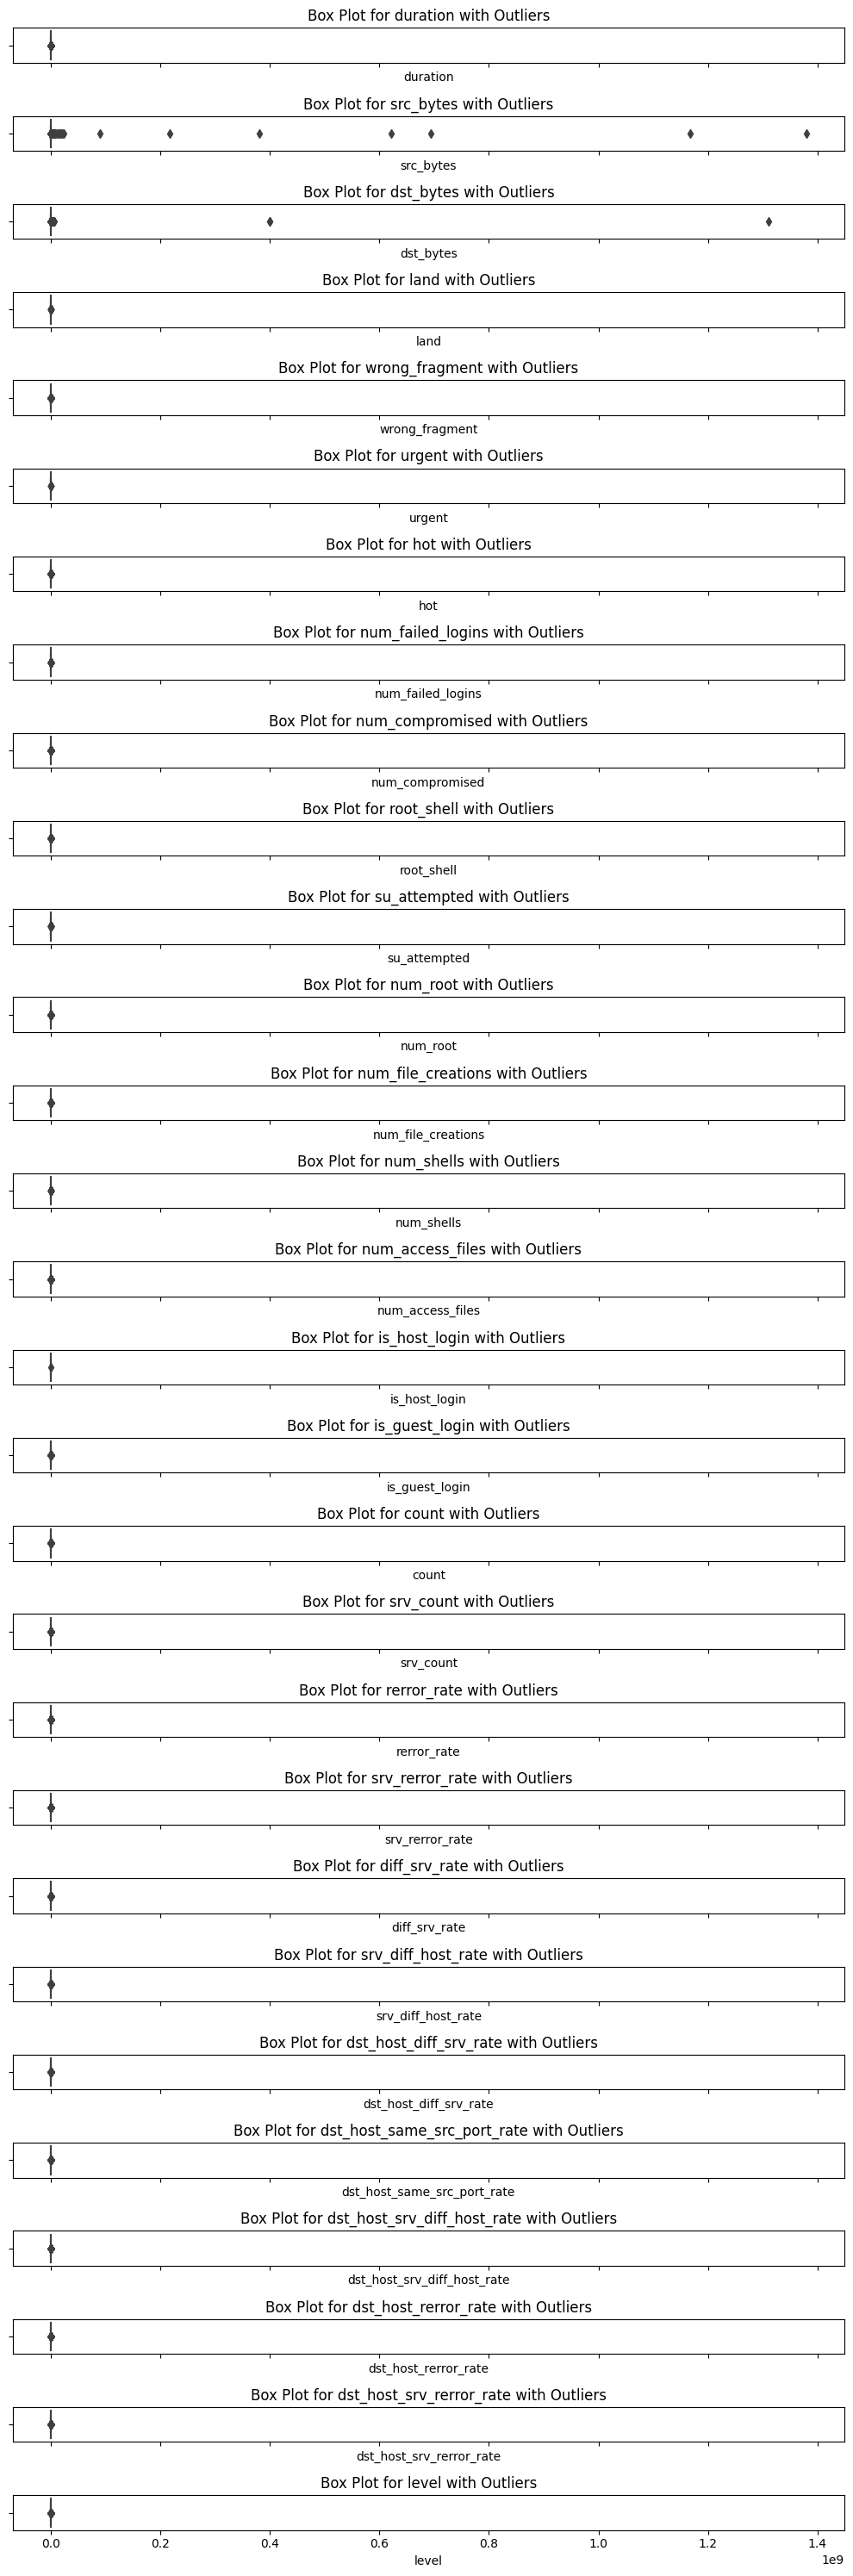

In [ ]:
#Visualisation des outliers
outlier_columns = ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
                    'urgent', 'hot', 'num_failed_logins', 'num_compromised', 'root_shell',
                    'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
                    'num_access_files', 'is_host_login', 'is_guest_login', 'count',
                    'srv_count', 'rerror_rate', 'srv_rerror_rate', 'diff_srv_rate',
                    'srv_diff_host_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
                    'dst_host_srv_diff_host_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate',
                    'level']

# Create subplots for each column
fig, axes = plt.subplots(nrows=len(outlier_columns), ncols=1, figsize=(10, 30), sharex=True)

# Plot box plots for each column
for i, col in enumerate(outlier_columns):
    sns.boxplot(x=data[col], ax=axes[i])
    axes[i].set_title(f'Box Plot for {col} with Outliers')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

In [ ]:
#Remplacement des outliers
def replace_outliers_with_quantile(data, threshold=0.99):
    cleaned_data = data.copy()

    # Storage des outliers before and after
    outliers_count = {'Before': {}, 'After': {}}

    for column in data.columns:
        if np.issubdtype(data[column].dtype, np.number):
            # Determiner la valeur du quantile
            quantile_value = data[column].quantile(threshold)

            # Compter les outliers avant replacement
            outlier_indices_before = data[column] > quantile_value
            outliers_count['Before'][column] = outlier_indices_before.sum()

            if outlier_indices_before.any():
                cleaned_data[column] = np.where(outlier_indices_before, quantile_value, cleaned_data[column])

            # Compter les outliers après replacement
            outlier_indices_after = cleaned_data[column] > quantile_value
            outliers_count['After'][column] = outlier_indices_after.sum()

    return cleaned_data, outliers_count

before_replacement = train.copy()

#Application de la fonction des outliers
train_after, outliers_count = replace_outliers_with_quantile(train)


#Affichage des outliers before and after
print("Outliers Count:")
print(pd.DataFrame(outliers_count))



Outliers Count:
                             Before  After
duration                          0      0
src_bytes                         0      0
dst_bytes                         0      0
land                             25      0
wrong_fragment                 1090      0
urgent                            9      0
hot                               0      0
num_failed_logins               122      0
logged_in                         0      0
num_compromised                   0      0
root_shell                      169      0
su_attempted                     80      0
num_root                        649      0
num_file_creations              287      0
num_shells                       47      0
num_access_files                371      0
num_outbound_cmds                 0      0
is_host_login                     1      0
is_guest_login                 1187      0
count                          1146      0
srv_count                      1108      0
serror_rate                       0   